In [9]:
from utils import *
from mechanisms import *
from attacks import *
from run_experiments import *
from visualization import *

In [10]:
experiments_plan = """
Data Generation Parameters
    What distribution: uniform, gaussian
    Data type: bit arrays, int arrays

DP Parameters:
    Laplace: Epsilon and sensitivity of the query function (depends on the data / attack)
    Gaussian: Same as above + delta

Attack Parameters
    Dinur Nissim: 
        function t(n) (# of queries)
        dn_epsilon
    
    CN19: 
        t(n) number of queries 
        
Bit arrays + Laplace
    fix dn_epsilon, vary # queries and laplace epsilon
    
1. Dinur Nissim + No DP 
    instantly solves

2. Laplace vs. Gaussian 
    # of queries needed queries needed to reconstrinct 95% or a few %s vs. epsilon; fix delta or try a couple deltas
        n 1.1n 1.2n etc 

3. When you noise, how much usefulness lost? 
    Fix everything (most queries from prev experiment) except amount of noise and plot. Plot two axes of epsilon vs both % reconstructed and accuracy maintained

4. CN19 Attack
    With bits, just see how much the # of queries decreases vs dinur nissim for a few different Ns. Keep epsilon as what we said was "most optimal" 

5. CN19 With Integers
    Normal vs. Uniform vs. Some bimodal/multimodal distributions 
    
6. Michael w/ a real world attack 

""" 

In [ ]:
dinur_nissim_laplace = run_experiment(
    ns = [500], 
    mechanism_class = LaplaceMechanism, 
    mech_args = [{"epsilon": x} for x in [round(.1*y, 1) for y in range(3,15)]], 
    dn_epsilon=10, 
    t_generators=([ConstantFunction(n) for n in [50*y for y in range(8, 20)]]), 
    output_filename="dinur_nissim_laplace.csv",
    attacker=dinur_nissim,
    data_maker=generate_bit_data,
    attacker_args=default_dn_args)

Running 144 experiments
Finished 1/144
Finished 2/144
Finished 3/144
Finished 4/144
Finished 5/144
Finished 6/144
Finished 7/144
Finished 8/144
Finished 9/144
Finished 10/144
Finished 11/144
Finished 12/144
Finished 13/144
Finished 14/144
Finished 15/144
Finished 16/144
Finished 17/144
Finished 18/144
Finished 19/144
Finished 20/144
Finished 21/144
Finished 22/144
Finished 23/144
Finished 24/144
Finished 25/144
Finished 26/144
Finished 27/144
Finished 28/144
Finished 29/144
Finished 30/144
Finished 31/144


In [ ]:
dinur_nissim_gaussian = run_experiment(
    ns = [500], 
    mechanism_class = GaussianMechanism, 
    mech_args = [{"epsilon": x, "delta" = 1} for x in [.1*y for y in range(3,15)]], 
    dn_epsilon=10, 
    t_generators=([ConstantFunction(n) for n in [50*y for y in range(8, 20)]]), 
    output_filename="dinur_nissim_gaussian.csv",
    attacker=dinur_nissim,
    data_maker=generate_bit_data,
    attacker_args=default_dn_args)

In [ ]:
cn19_laplace_bits = run_experiment(
    ns = [500], 
    mechanism_class = LaplaceMechanism, 
    mech_args = [{"epsilon": x} for x in [round(.1*y, 1) for y in range(3,15)]], 
    dn_epsilon=10, 
    t_generators=([ConstantFunction(n) for n in [50*y for y in range(10, 20)]]), 
    output_filename="cn19_laplace_bits.csv",
    attacker=cn19,
    data_maker=generate_bit_data,
    attacker_args={})

In [ ]:
cn19_laplace_ints = run_experiment(
    ns = [500], 
    mechanism_class = LaplaceMechanism, 
    mech_args = [{"epsilon": x} for x in [round(.1*y, 1) for y in range(3,15)]], 
    dn_epsilon=10, 
    t_generators=([ConstantFunction(n) for n in [50*y for y in range(10, 20)]]), 
    output_filename="cn19_laplace_ints.csv",
    attacker=cn19,
    data_maker=generate_int_data,
    attacker_args={})

Running 100 experiments
Finished 1/100
Finished 2/100
Finished 3/100
Finished 4/100
Finished 5/100
Finished 6/100
Finished 7/100
Finished 8/100
Finished 9/100
Finished 10/100
Finished 11/100
Finished 12/100
Finished 13/100
Finished 14/100
Finished 15/100
Finished 16/100
Finished 17/100
Finished 18/100
Finished 19/100
Finished 20/100
Finished 21/100
Finished 22/100
Finished 23/100
Finished 24/100
Finished 25/100
Finished 26/100
Finished 27/100
Finished 28/100
Finished 29/100


In [7]:
dinur_nissim_laplace = read_results("data/dinur_nissim_laplace.csv")
dinur_nissim_laplace

,n,epsilon,dn_epsilon,num_queries,percent_reconstructed,mechanism_error
0,500,0.5,10,500,0.820,1.926794
1,500,0.5,10,550,0.860,1.926794
2,500,0.5,10,600,0.894,1.926794
3,500,0.5,10,650,0.894,1.926794
4,500,0.5,10,700,0.938,1.926794
...,...,...,...,...,...,...
95,500,1.4,10,750,1.000,0.638469
96,500,1.4,10,800,1.000,0.638469
97,500,1.4,10,850,1.000,0.638469
98,500,1.4,10,900,1.000,0.638469


/Users/macuser/Desktop/cs226finalproject/run_experiments.py:108: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


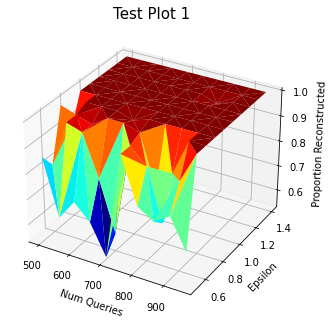

In [8]:
plot_3d_eps_t(dinur_nissim_laplace, title="Test Plot 1")

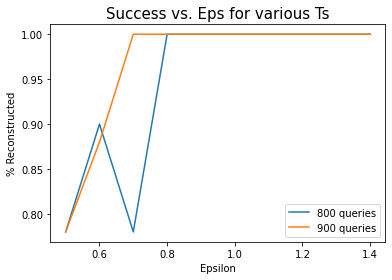

In [5]:
plot_eps_multiple_t(dinur_nissim_laplace, ts = [800, 900])

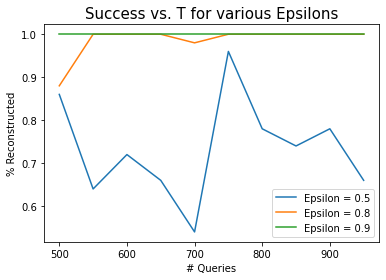

In [6]:
plot_t_multiple_eps(dinur_nissim_laplace, epss=[.5, .8, .9])

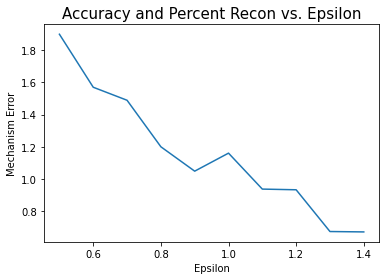

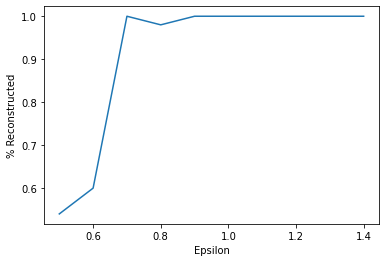

In [7]:
# Be sure to only run this on one fixed number of queries
recon_accuracy_tradeoff(dinur_nissim_laplace[dinur_nissim_laplace.num_queries == 700])

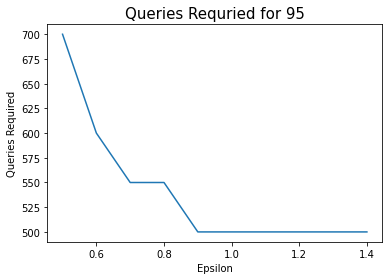

In [17]:
epsilon_thresshold(dinur_nissim_laplace, threshold=.9, title="Queries Requried for 95")